In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.utils.data as data
import matplotlib.pyplot as plt

import os

import numpy as np

from CNN import SimpleCNN

from odl_funcs.ellipses import EllipsesDataset

from sirf.STIR import MessageRedirector, ImageData, AcquisitionData, AcquisitionModelUsingRayTracingMatrix
import sirf.STIR
from sirf.Utilities import examples_data_path
data_path = os.path.join(examples_data_path('PET'), 'thorax_single_slice')

msg = MessageRedirector()
sirf.STIR.set_verbosity(0)

attn_image = ImageData(os.path.join(data_path, 'attenuation.hv'))
template = AcquisitionData(os.path.join(data_path, 'template_sinogram.hs'))
radon_transform = AcquisitionModelUsingRayTracingMatrix()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
# set-up redirection of STIR messages to files
msg_red = MessageRedirector('info.txt', 'warnings.txt', 'errors.txt')

# big plots
plt.rcParams['figure.dpi'] = 200

In [3]:
def normalise_image(image):
    """Normalise image to range [0,1]"""
    image = image - image.min()
    image = image / image.max()
    return image

In [4]:
def plot_2d_image(idx,vol,title,clims=None,cmap="viridis"):
    """Customized version of subplot to plot 2D image"""
    plt.subplot(*idx)
    plt.imshow(vol,cmap=cmap)
    if not clims is None:
        plt.clim(clims)
    plt.colorbar(shrink=.4)
    plt.title(title)
    plt.axis("off")

In [5]:
train_dataloader = torch.utils.data.DataLoader( \
    EllipsesDataset(radon_transform, attn_image, template, mode="train", n_samples = 10) \
    , batch_size=1, shuffle=True)

/home/sirfuser/devel/Wei/SIRF-Exercises/notebooks/PET_sensitivity/odl_funcs/ellipses.py:121: RuntimeWarning: invalid value encountered in long_scalars
  sx = dx / d
/home/sirfuser/devel/Wei/SIRF-Exercises/notebooks/PET_sensitivity/odl_funcs/ellipses.py:122: RuntimeWarning: invalid value encountered in long_scalars
  sy = dy / d


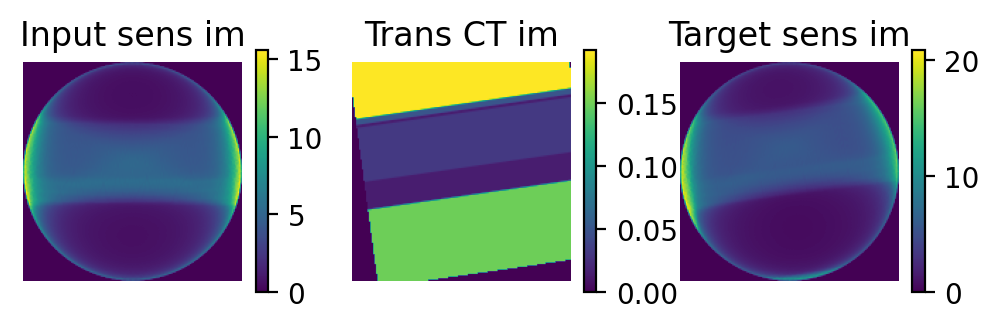

In [6]:
iterator = iter(train_dataloader)

# get a single batch
data = next(iterator)


X, y = data  # X is the batch of features, y is the batch of targets.
plot_2d_image([1,3,1], X[0,0,:,:].numpy(), "Input sens im")
plot_2d_image([1,3,2], X[0,1,:,:].numpy(), "Trans CT im")
plot_2d_image([1,3,3], y[0,0,:,:].numpy(), "Target sens im")